# Forest Cover Type Prediction
### 3. Further Experiments to Improve Model Performance (2)
![forest-cover-type-coverimage](https://kaggle2.blob.core.windows.net/competitions/kaggle/3936/logos/front_page.png)
<center>https://www.kaggle.com/c/forest-cover-type-prediction</center>


In [1]:
import random
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from mlxtend.classifier import EnsembleVoteClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.learning_curve import learning_curve
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle

import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [2]:
X_scaled_train = pd.read_csv('data/X_scaled_train.csv')
X_scaled_test = pd.read_csv('data/X_scaled_test.csv')
y_train = pd.read_csv('data/train.csv', usecols=['Cover_Type']).values.ravel()
etc_best_params = {'class_weight': 'balanced',
                     'criterion': 'gini',
                     'max_depth': 50,
                     'max_features': 0.3,
                     'max_leaf_nodes': None,
                     'min_impurity_decrease': 0,
                     'min_samples_leaf': 1,
                     'min_samples_split': 2,
                     'n_estimators': 200}

etc_best = ExtraTreesClassifier(**etc_best_params, random_state=0)

### Analyze results from Experiment 1, 2

#### `Hypothesis 1`
* Did we really get the best model & feature set?
  * Our  model `ExtraTreesClassifier` seems to face a kind of cap for its performance.

#### `Hypothesis 2`
* From the feature engineering & feature generating, the expected effects from experiment 1 and 2 are already accomplished.
  * We need to find other approaches other than those (adding more importance on certain features, adding new dimensions, etc...)

#### `Hypothesis 3`
* The feature engineering could have been better.
  * We need to find other approaches to seperate target class `1` and `2` more effectively.

From **`Hypothesis 1`**
## Experiment 3.
## Check the performance of `Boosting` model
* We will test `XGBoost`
  * Hyperparameter Tuning
  * ...

In [7]:
cols_rfecv_xgboost = ['Aspect','Elevation','Elevation_log_cdf_3','Elevation_log_cdf_4',
 'Elevation_log_pdf_1','Elevation_log_pdf_2', 'Elevation_log_pdf_3', 'Elevation_log_pdf_4',
 'Elevation_log_pdf_5', 'Elevation_log_pdf_6', 'Elevation_log_pdf_7', 'Hillshade_3pm',
 'Hillshade_9am', 'Hillshade_Noon', 'Horizontal_Distance_To_Fire_Points', 'Horizontal_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways', 'Slope', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13',
 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type2', 'Soil_Type20', 'Soil_Type22', 'Soil_Type23',
 'Soil_Type24', 'Soil_Type27', 'Soil_Type3', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33',
 'Soil_Type34', 'Soil_Type39', 'Soil_Type4', 'Soil_Type40', 'Soil_Type5', 'Soil_Type6', 'Vertical_Distance_To_Hydrology',
 'Wilderness_Area', 'Wilderness_Area2', 'Wilderness_Area3', 'Slope_Direction', 'Slope_Direction_2', 'Slope_Direction_4',
 'Slope_Direction_6', 'Slope_Direction_7', 'Soil_Type', 'Soils_Cover1', 'Soils_Cover2', 'Soils_Cover3', 'Soils_Cover4',
 'Soils_Cover5', 'Soils_Cover6', 'Soils_Cover7', 'Elevation_Cover3', 'Elevation_Cover4', 'Elevation_Cover5',
 'Vertical_Distance_To_Hydrology_sqrd', 'Diagnoal_Distance_To_Hydrology', 'Vertical_Distance_Sum_EH', 'Vertical_Distance_Diff_EH',
 'Vertical_Distance_Div_EH', 'Vertical_Distance_Mult_EH', 'Horizontal_Distance_Sum_HRF', 'Horizontal_Distance_Sum_HR',
 'Horizontal_Distance_Sum_HF', 'Horizontal_Distance_Sum_RF', 'Horizontal_Distance_Diff_HRF', 'Horizontal_Distance_Diff_HR',
 'Horizontal_Distance_Diff_HF', 'Horizontal_Distance_Diff_RF', 'Horizontal_Distance_Mult_HRF', 'Horizontal_Distance_Mult_HR',
 'Horizontal_Distance_Mult_HF', 'Horizontal_Distance_Mult_RF', 'Hillshade_Sum', 'Hillshade_Sum_0912', 'Hillshade_Sum_1215',
 'Hillshade_Sum_0915', 'Hillshade_Diff', 'Hillshade_Diff_0912', 'Hillshade_Diff_1215', 'Hillshade_Diff_0915', 'Hillshade_Mult_0912',
 'Hillshade_ratio_091215', 'Hillshade_ratio_0912', 'Hillshade_ratio_1215', 'Hillshade_ratio_0915',
 'Radians_To_Hydrology', 'Vertical_Distance_Div_EH_sqrd', 'Vertical_Distance_Mult_EH_sqrd', 'Horizontal_Distance_Diff_HR_sqrd',
 'Horizontal_Distance_Diff_HF_sqrd', 'Horizontal_Distance_Diff_RF_sqrd', 'Horizontal_Distance_Mult_HRF_sqrd',
 'Horizontal_Distance_Mult_HR_cube', 'Horizontal_Distance_Mult_HF_cube', 'Horizontal_Distance_Mult_RF_cube',
 'Hillshade_Diff_0912_sqrd', 'Hillshade_Diff_1215_sqrd', 'Hillshade_Diff_0915_sqrd', 'Radians_To_Hydrology_sqrd',
 'Elevation_Cover_Wilderness']

test_weight1 = {1: 10.571428571428532,
 2: 11.999999999999948,
 3: 5.8571428571428354,
 4: 1.5238095238095191,
 5: 1.5952380952380845,
 6: 3.7619047619047512,
 7: 1.0}

test_weight2 = {1: 3.0458715596330284,
 2: 3.467889908256879,
 3: 1.9266055045871575,
 4: 1.0,
 5: 1.4587155963302754,
 6: 2.0366972477064214,
 7: 1.0550458715596318}

test_weight3 = {1: 32.199213630406177,
 2: 41.614678899082371,
 3: 11.284403669724737,
 4: 1.5238095238095191,
 5: 2.3269986893839949,
 6: 7.6618610747050875,
 7: 1.0550458715596318}

test_weight3_sqrd = {k:v**2 for k,v in test_weight3.items()}

In [4]:
X_scaled_train_xgb = X_scaled_train[cols_rfecv_xgboost]

### XGBoost Parameters

https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

```
XGBClassifier(
max_depth=3, 
learning_rate=0.1, 
n_estimators=100,
silent=True, 
objective='binary:logistic',
booster='gbtree', 
n_jobs=1, 
nthread=None, 
gamma=0, 
min_child_weight=1, 
max_delta_step=0, 
subsample=1, 
colsample_bytree=1, 
colsample_bylevel=1, 
reg_alpha=0, 
reg_lambda=1, 
scale_pos_weight=1,
base_score=0.5, 
random_state=0, 
seed=None, 
missing=None, 
**kwargs)
```

### General Approach for Parameter Tuning
We will use an approach similar to that of GBM here. The various steps to be performed are:

* Choose a relatively **high learning rate**. Generally a learning rate of 0.1 works but somewhere between 0.05 to 0.3 should work for different problems. 
* Determine the **optimum number of trees for this learning rate**. XGBoost has a very useful function called as “cv” which performs cross-validation at each boosting iteration and thus returns the optimum number of trees required.
* **Tune tree-specific parameters** ( `max_depth, min_child_weight, gamma, subsample, colsample_bytree`) for decided learning rate and number of trees. Note that we can choose different parameters to define a tree and I’ll take up an example here.
* Tune **regularization parameters** (`lambda, alpha`) for xgboost which can help reduce model complexity and enhance performance.
* **Lower the learning rate** and decide the optimal parameters .

### Step 1: Fix learning rate and number of estimators for tuning tree-based parameters

In order to decide on boosting parameters, we need to set some initial values of other parameters. Lets take the following values:

1. `max_depth = 5` : This should be between 3-10. I’ve started with 5 but you can choose a different number as well. 4-6 can be good starting points.
2. `min_child_weight = 1` : A smaller value is chosen because it is a highly imbalanced class problem and leaf nodes can have smaller size groups.
3. `gamma` = 0 : A smaller value like 0.1-0.2 can also be chosen for starting. This will anyways be tuned later.
4. `subsample, colsample_bytree = 0.8` : This is a commonly used used start value. Typical values range between 0.5-0.9.
5. `scale_pos_weight = 1`: Because of high class imbalance.

In [44]:
import xgboost as xgb
from sklearn import metrics

def modelfit(alg, dtrain, predictors, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain['Cover_Type'].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
                    metrics='merror', early_stopping_rounds=early_stopping_rounds)
        print(cvresult.shape[0])
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Cover_Type'], eval_metric='merror')
    print(alg)
    return alg

In [92]:
Xy_scaled_train_xgb = pd.concat([X_scaled_train_xgb, pd.Series(y_train, name='Cover_Type')], axis=1)

# To use the XGBoost with parameter `objective = 'multi:softmax'` and `num_class=7`,
# We substract the value of Cover_Type by 1
# We will add them by 1 before submitting.
Xy_scaled_train_xgb['Cover_Type'] -= 1
Xy_scaled_train_xgb.head()

,Aspect,Elevation,Elevation_log_cdf_3,Elevation_log_cdf_4,Elevation_log_pdf_1,Elevation_log_pdf_2,Elevation_log_pdf_3,Elevation_log_pdf_4,Elevation_log_pdf_5,Elevation_log_pdf_6,...,Horizontal_Distance_Mult_HRF_sqrd,Horizontal_Distance_Mult_HR_cube,Horizontal_Distance_Mult_HF_cube,Horizontal_Distance_Mult_RF_cube,Hillshade_Diff_0912_sqrd,Hillshade_Diff_1215_sqrd,Hillshade_Diff_0915_sqrd,Radians_To_Hydrology_sqrd,Elevation_Cover_Wilderness,Cover_Type
0,-0.959980,-0.367095,0.296517,0.480531,-0.744293,-0.372398,0.701811,-0.566530,-0.194353,0.897713,...,0.103452,-0.302929,4.009673,-0.507369,-0.659225,-0.223423,-0.486271,-0.797858,-0.607791,4
1,-0.914559,-0.381461,0.275943,0.480235,-0.744870,-0.406773,0.748472,-0.564476,-0.245271,0.945931,...,-0.195535,-0.304471,2.027544,-0.507369,-0.609942,-0.223423,-0.532906,-0.788949,-0.607791,4
2,-0.160577,0.130912,0.689552,0.482045,-0.438988,1.394842,-0.532798,-0.577917,2.391609,-0.465674,...,-0.385151,0.252084,4.175117,-0.507369,-0.708982,0.378510,-0.119105,-0.167827,-0.607791,1
3,-0.015231,0.085421,0.673376,0.482044,-0.518279,1.238117,-0.462393,-0.577905,2.448002,-0.384104,...,-0.385151,0.071326,3.141229,-0.507369,-0.716564,0.860836,0.180983,1.492581,-0.607791,1
4,-1.014485,-0.369489,0.293131,0.480485,-0.744395,-0.378232,0.709582,-0.566209,-0.203197,0.905764,...,-0.287566,-0.304787,0.549490,-0.507369,-0.623684,-0.223423,-0.521494,-0.797382,-0.607791,4


In [45]:
xgb1 = XGBClassifier(
             learning_rate =0.1,
             n_estimators=1000,
             max_depth=5,
             min_child_weight=1,
             gamma=0,
             subsample=0.8,
             colsample_bytree=0.8,
             objective= 'multi:softmax',
             num_class = 7,
             scale_pos_weight=1,
             seed=77)

xgb1_cvfit = modelfit(xgb1, Xy_scaled_train_xgb, X_scaled_train_xgb.columns)

471
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=471,
       n_jobs=1, nthread=None, num_class=7, objective='multi:softprob',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=77, silent=True, subsample=0.8)


In [93]:
train = Xy_scaled_train_xgb
predictors = X_scaled_train_xgb.columns
target = 'Cover_Type'

In [47]:
#Predict training set:
train_predictions = xgb1_cvfit.predict(train[predictors])
train_predprob = xgb1_cvfit.predict_proba(train[predictors])[:,1]

#Print model report:
print("\nModel Report")
print("Accuracy : %.4g" % metrics.accuracy_score(train['Cover_Type'].values, train_predictions))


Model Report
Accuracy : 0.9998


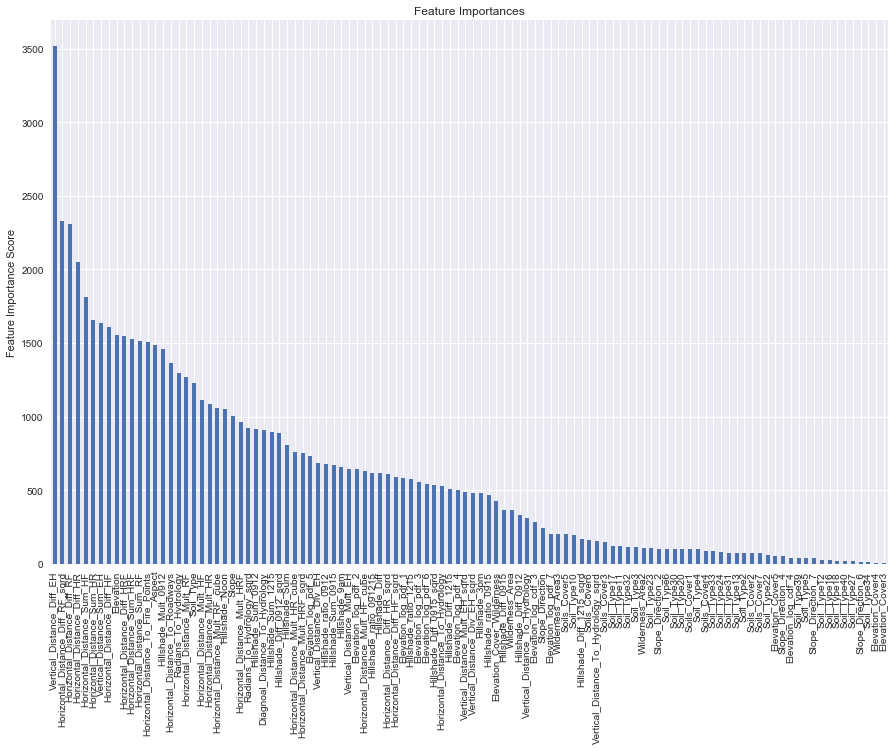

In [59]:
feat_imp = pd.Series(xgb1_cvfit.get_booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances', figsize=(15,10))
plt.ylabel('Feature Importance Score')
plt.show()

### Step 2: Tune max_depth and min_child_weight
We tune these first as they will have the highest impact on model outcome. To start with, let’s set wider ranges and then we will perform another iteration for smaller ranges.

#### Important Note: 
I’ll be doing some heavy-duty grid searched in this section which can take 15-30 mins or even more time to run depending on your system. You can vary the number of values you are testing based on what your system can handle.

In [64]:
param_test1 = {
 'max_depth':range(3, 10, 2),
 'min_child_weight':range(1, 6, 2)
}

gsearch1 = GridSearchCV(estimator=XGBClassifier
                        (learning_rate =0.1, n_estimators=471, max_depth=5,
                         min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                         objective= 'multi:softmax', scale_pos_weight=1, seed=77),
                         param_grid = param_test1,
                         scoring='accuracy',
                         iid=False,
                         cv=5)

gsearch1.fit(train[predictors],train[target])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.77646, std: 0.03455, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.77361, std: 0.03596, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.77249, std: 0.03550, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.79795, std: 0.03434, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.79577, std: 0.03383, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.79239, std: 0.03496, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.80417, std: 0.03442, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.79901, std: 0.03398, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.79689, std: 0.03464, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.80582, std: 0.03467, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: 0.80311, std: 0.03396, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: 0.80106, std: 0.03502, params: {'max_depth': 9, 'min_child_weight': 5}],
 {'max_depth': 9, 'min_child_weight': 1

In [65]:
gsearch1_2 = GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                                               colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
                                               max_depth=5, min_child_weight=1, missing=None, n_estimators=471,
                                               n_jobs=1, nthread=None, num_class=7, objective='multi:softprob',
                                               random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                                               seed=77, silent=True, subsample=0.8),
                         param_grid = param_test1,
                         scoring='accuracy',
                         iid=False,
                         cv=5)

gsearch1_2.fit(train[predictors],train[target])
gsearch1_2.grid_scores_, gsearch1_2.best_params_, gsearch1_2.best_score_

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.77646, std: 0.03455, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.77361, std: 0.03596, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.77249, std: 0.03550, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.79795, std: 0.03434, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.79577, std: 0.03383, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.79239, std: 0.03496, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.80417, std: 0.03442, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.79901, std: 0.03398, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.79689, std: 0.03464, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.80582, std: 0.03467, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: 0.80311, std: 0.03396, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: 0.80106, std: 0.03502, params: {'max_depth': 9, 'min_child_weight': 5}],
 {'max_depth': 9, 'min_child_weight': 1

Lets go one step deeper and look for optimum values. We’ll search for values 1 / .5 above and below the optimum values because we took an interval of two.

In [67]:
param_test2 = {
 'max_depth':[8, 9, 10],
 'min_child_weight':[0.5 ,1]
}

gsearch2 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1, n_estimators=471, max_depth=5,
                                         min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                         objective= 'multi:softmax', scale_pos_weight=1,seed=77), 
                                         param_grid = param_test2, scoring='accuracy',iid=False, cv=5)

gsearch2.fit(train[predictors],train[target])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.80780, std: 0.03435, params: {'max_depth': 8, 'min_child_weight': 0.5},
  mean: 0.80562, std: 0.03441, params: {'max_depth': 8, 'min_child_weight': 1},
  mean: 0.80628, std: 0.03550, params: {'max_depth': 9, 'min_child_weight': 0.5},
  mean: 0.80582, std: 0.03467, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: 0.80794, std: 0.03347, params: {'max_depth': 10, 'min_child_weight': 0.5},
  mean: 0.80661, std: 0.03376, params: {'max_depth': 10, 'min_child_weight': 1}],
 {'max_depth': 10, 'min_child_weight': 0.5},
 0.80793650793650795)

In [73]:
param_test2 = {
 'max_depth':[10, 20, 30],
 'min_child_weight':[0.1, 0.3, 0.7, 1, 3]
}

gsearch2 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1, n_estimators=471, max_depth=5,
                                         min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                         objective= 'multi:softmax', nthread=4, scale_pos_weight=1,seed=77), 
                                         param_grid = param_test2, scoring='accuracy',iid=False, cv=5)

gsearch2.fit(train[predictors],train[target])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.80807, std: 0.03343, params: {'max_depth': 10, 'min_child_weight': 0.1},
  mean: 0.80728, std: 0.03286, params: {'max_depth': 10, 'min_child_weight': 0.3},
  mean: 0.80866, std: 0.03381, params: {'max_depth': 10, 'min_child_weight': 0.7},
  mean: 0.80661, std: 0.03376, params: {'max_depth': 10, 'min_child_weight': 1},
  mean: 0.80284, std: 0.03593, params: {'max_depth': 10, 'min_child_weight': 3},
  mean: 0.80820, std: 0.03288, params: {'max_depth': 20, 'min_child_weight': 0.1},
  mean: 0.80919, std: 0.03484, params: {'max_depth': 20, 'min_child_weight': 0.3},
  mean: 0.80939, std: 0.03331, params: {'max_depth': 20, 'min_child_weight': 0.7},
  mean: 0.80615, std: 0.03407, params: {'max_depth': 20, 'min_child_weight': 1},
  mean: 0.80337, std: 0.03290, params: {'max_depth': 20, 'min_child_weight': 3},
  mean: 0.80860, std: 0.03408, params: {'max_depth': 30, 'min_child_weight': 0.1},
  mean: 0.80747, std: 0.03453, params: {'max_depth': 30, 'min_child_weight': 0.3},
  mean: 0.80

* We will take `max_depth=9` and `min_child_weight=3` and keep tuning parameters.

### Step 3: Tune gamma
Now lets tune gamma value using the parameters already tuned above. Gamma can take various values but I’ll check for 5 values here. You can go into more precise values as.

In [74]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
xgb_gsearch3 = XGBClassifier( learning_rate =0.1, n_estimators=471, max_depth=5,
                             min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
                             objective= 'multi:softmax', nthread=4, scale_pos_weight=1, seed=77)
xgb_gsearch3.set_params(**gsearch2.best_params_)
gsearch3 = GridSearchCV(estimator = xgb_gsearch3, param_grid = param_test3, 
                        scoring='accuracy', iid=False, cv=5)

gsearch3.fit(train[predictors],train[target])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.80999, std: 0.03208, params: {'gamma': 0.0},
  mean: 0.80648, std: 0.03547, params: {'gamma': 0.1},
  mean: 0.80357, std: 0.03327, params: {'gamma': 0.2},
  mean: 0.80456, std: 0.03481, params: {'gamma': 0.3},
  mean: 0.80218, std: 0.03578, params: {'gamma': 0.4}],
 {'gamma': 0.0},
 0.80998677248677242)

This shows that our original value of gamma, i.e. 0 is the optimum one. 

* Before proceeding, a good idea would be to **re-calibrate the number of boosting rounds for the updated parameters**.

In [75]:
def modelfit(alg, dtrain, predictors, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain['Cover_Type'].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], 
                          nfold=cv_folds, metrics='merror', 
                          early_stopping_rounds=early_stopping_rounds)
        print(cvresult.shape[0])
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Cover_Type'], eval_metric='merror')
    print(alg)

    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]

    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain['Cover_Type'].values, dtrain_predictions))

    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances', figsize=(15,10))
    plt.ylabel('Feature Importance Score')
    plt.show()

204
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.0, learning_rate=0.1,
       max_delta_step=0, max_depth=30, min_child_weight=0.7, missing=None,
       n_estimators=204, n_jobs=1, nthread=4, num_class=7,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=77, silent=True,
       subsample=0.8)

Model Report
Accuracy : 1


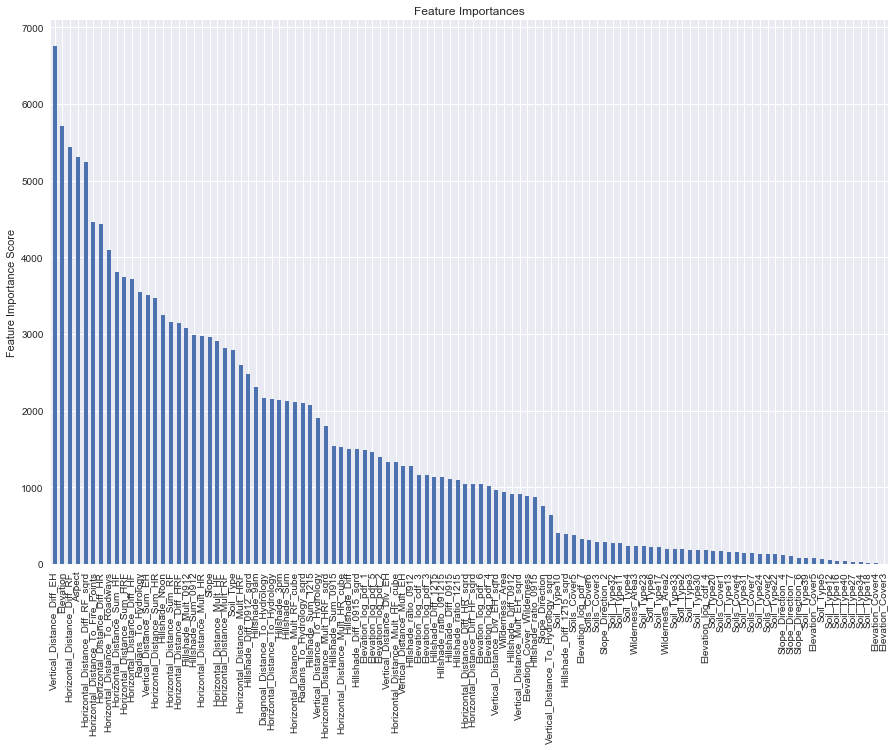

In [78]:
xgb2 = XGBClassifier(
         learning_rate =0.1,
         n_estimators=1000,
         max_depth=9,
         min_child_weight=3,
         gamma=0,
         subsample=0.8,
         colsample_bytree=0.8,
         objective= 'multi:softmax',
         num_class=7,
         nthread=4,
         scale_pos_weight=1,
         seed=77)
xgb2.set_params(**gsearch2.best_params_)
xgb2.set_params(**gsearch3.best_params_)

modelfit(xgb2, train, predictors)

Here, we can see the improvement in score. So the final parameters are:
* n_estimators : 204
* max_depth: 30
* min_child_weight: 0.7
* gamma: 0

### Step 4: Tune subsample and colsample_bytree
The next step would be try different subsample and colsample_bytree values. Lets do this in 2 stages as well and take values 0.6,0.7,0.8,0.9 for both to start with.

#### Tuning `subsample` parameter + Duplicating samples with label `0` and `1` (originally `1` and `2`)
* See the result!
* What if we only duplicate sampels with label 0 and 1 without setting 'subsample' parameter?

In [97]:
y_train_srs = pd.Series(y_train, name='Cover_Type') - 1
y_train_srs_c12 = y_train_srs[(y_train_srs==1) | (y_train_srs == 2)]
X_scaled_train_c12 = X_scaled_train.iloc[y_train_srs_c12.index]

Xy_dup12_pt = pd.concat([X_scaled_train_c12, y_train_srs_c12], axis=1)[train.columns]

In [100]:
train_dup12 = pd.concat([train, Xy_dup12_pt], axis=0).reset_index(drop=True)
train_dup12_2 = pd.concat([train_dup12, Xy_dup12_pt], axis=0).reset_index(drop=True)
train_dup12_3 = pd.concat([train_dup12_2, Xy_dup12_pt], axis=0).reset_index(drop=True)

In [104]:
param_test4 = {
 'subsample':[0.6, 0.8, 1],
 'colsample_bytree':[0.6, 0.8, 1]
}

for i, dupled in enumerate([train_dup12, train_dup12_2, train_dup12_3]):
    print('duplicated train set num {}'.format(i+1))
    gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=204, max_depth=30,
                                             min_child_weight=0.7, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                             objective= 'multi:softmax', nthread=4, scale_pos_weight=1,seed=77), 
                                             param_grid = param_test4, scoring='accuracy',n_jobs=4,iid=False, cv=5)
    gsearch4.fit(dupled[predictors],dupled[target])
    print(gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_)
    print('#'*30)

duplicated train set num 1


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.89033, std: 0.03593, params: {'colsample_bytree': 0.6, 'subsample': 0.6}, mean: 0.89280, std: 0.03449, params: {'colsample_bytree': 0.6, 'subsample': 0.8}, mean: 0.89347, std: 0.03460, params: {'colsample_bytree': 0.6, 'subsample': 1}, mean: 0.89012, std: 0.03570, params: {'colsample_bytree': 0.8, 'subsample': 0.6}, mean: 0.89249, std: 0.03607, params: {'colsample_bytree': 0.8, 'subsample': 0.8}, mean: 0.89126, std: 0.03477, params: {'colsample_bytree': 0.8, 'subsample': 1}, mean: 0.89151, std: 0.03588, params: {'colsample_bytree': 1, 'subsample': 0.6}, mean: 0.89131, std: 0.03469, params: {'colsample_bytree': 1, 'subsample': 0.8}, mean: 0.89084, std: 0.03419, params: {'colsample_bytree': 1, 'subsample': 1}] {'colsample_bytree': 0.6, 'subsample': 1} 0.893467078189
##############################
duplicated train set num 2


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.90585, std: 0.02874, params: {'colsample_bytree': 0.6, 'subsample': 0.6}, mean: 0.90673, std: 0.02971, params: {'colsample_bytree': 0.6, 'subsample': 0.8}, mean: 0.90850, std: 0.02923, params: {'colsample_bytree': 0.6, 'subsample': 1}, mean: 0.90560, std: 0.02983, params: {'colsample_bytree': 0.8, 'subsample': 0.6}, mean: 0.90749, std: 0.03021, params: {'colsample_bytree': 0.8, 'subsample': 0.8}, mean: 0.90694, std: 0.03033, params: {'colsample_bytree': 0.8, 'subsample': 1}, mean: 0.90619, std: 0.03058, params: {'colsample_bytree': 1, 'subsample': 0.6}, mean: 0.90787, std: 0.03032, params: {'colsample_bytree': 1, 'subsample': 0.8}, mean: 0.90581, std: 0.02984, params: {'colsample_bytree': 1, 'subsample': 1}] {'colsample_bytree': 0.6, 'subsample': 1} 0.908501683502
##############################
duplicated train set num 3
[mean: 0.91766, std: 0.02600, params: {'colsample_bytree': 0.6, 'subsample': 0.6}, mean: 0.91852, std: 0.02694, params: {'colsample_bytree': 0.6, 'subsample':

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


* As in the previous notebook, the CV result and the actual kaggle submission score could differ.
* Let's check the kaggle score of each model using duplicated train set

In [105]:
def make_submission_csv(model, Xtrain, y, Xtest, filename):
    model_fit = model.fit(Xtrain, y)
    submit_df = pd.read_csv('data/sampleSubmission.csv')
    submit_df['Cover_Type'] = model_fit.predict(Xtest)
    submit_df.to_csv(filename, index=False)

In [106]:
for i, df in enumerate([train, train_dup12, train_dup12_2, train_dup12_3]):
    print(i, end='/')
    xgb_opt = XGBClassifier( learning_rate =0.1, n_estimators=204, max_depth=30,
                             min_child_weight=0.7, gamma=0, subsample=1, colsample_bytree=0.6,
                             objective= 'multi:softmax', nthread=4, scale_pos_weight=1,seed=77)
    make_submission_csv(xgb_opt, df[predictors], df[target], X_scaled_test[predictors],
                       'data/submit_xgb_c12_concat_'+str(i)+'.csv')

0/1/2/3/

In [110]:
(pd.read_csv('data/submit_xgb_c12_concat_0.csv')+1).to_csv('data/submit_xgb_c12_concat_0.csv', index=False)
(pd.read_csv('data/submit_xgb_c12_concat_1.csv')+1).to_csv('data/submit_xgb_c12_concat_1.csv', index=False)
(pd.read_csv('data/submit_xgb_c12_concat_2.csv')+1).to_csv('data/submit_xgb_c12_concat_2.csv', index=False)
(pd.read_csv('data/submit_xgb_c12_concat_3.csv')+1).to_csv('data/submit_xgb_c12_concat_3.csv', index=False)

In [116]:
for i in range(4):
    subdf = pd.read_csv('data/submit_xgb_c12_concat_'+str(i)+'.csv')
    subdf['Id'] -= 1
    subdf.to_csv('data/submit_xgb_c12_concat_'+str(i)+'.csv', index=False)

In [117]:
!kaggle competitions submit -c forest-cover-type-prediction -f data/submit_xgb_c12_concat_0.csv -m 'submit_xgb_c12_concat_0'
!kaggle competitions submit -c forest-cover-type-prediction -f data/submit_xgb_c12_concat_1.csv -m 'submit_xgb_c12_concat_1'
!kaggle competitions submit -c forest-cover-type-prediction -f data/submit_xgb_c12_concat_2.csv -m 'submit_xgb_c12_concat_2'
!kaggle competitions submit -c forest-cover-type-prediction -f data/submit_xgb_c12_concat_3.csv -m 'submit_xgb_c12_concat_3'

Successfully submitted to Forest Cover Type Prediction
Successfully submitted to Forest Cover Type Prediction
Successfully submitted to Forest Cover Type Prediction
Successfully submitted to Forest Cover Type Prediction


### `submit_xgb_c12_concat_0.csv`
a minute ago by Kyuhyung Choi/
'submit_xgb_c12_concat_0'/
**0.78379**

### `submit_xgb_c12_concat_1.csv`
a minute ago by Kyuhyung Choi
'submit_xgb_c12_concat_1'
 **0.79004**

### `submit_xgb_c12_concat_2.csv`
a few seconds ago by Kyuhyung Choi
'submit_xgb_c12_concat_2'
** 0.79225**

### `submit_xgb_c12_concat_3.csv`
a few seconds ago by Kyuhyung Choi
'submit_xgb_c12_concat_3'
** 0.79373**


In [118]:
train_dup12_10 = train.copy()
for i in range(10):
    train_dup12_10 = pd.concat([train_dup12_10, Xy_dup12_pt], axis=0).reset_index(drop=True)

In [119]:
xgb_opt = XGBClassifier( learning_rate =0.1, n_estimators=204, max_depth=30,
                             min_child_weight=0.7, gamma=0, subsample=1, colsample_bytree=0.6,
                             objective= 'multi:softmax', nthread=4, scale_pos_weight=1,seed=77)
make_submission_csv(xgb_opt, train_dup12_3[predictors], train_dup12_3[target], X_scaled_test[predictors],
                   'data/submit_xgb_c12_concat_10.csv')

In [120]:
submit_xgb_c12_concat_10 = pd.read_csv('data/submit_xgb_c12_concat_10.csv')
submit_xgb_c12_concat_10['Cover_Type'] += 1
submit_xgb_c12_concat_10.to_csv('data/submit_xgb_c12_concat_10.csv', index=False)

In [122]:
!kaggle competitions submit -c forest-cover-type-prediction -f data/submit_xgb_c12_concat_10.csv -m 'submit_xgb_c12_concat_10.csv'

Successfully submitted to Forest Cover Type Prediction


### `submit_xgb_c12_concat_10.csv`
a few seconds ago by Kyuhyung Choi
'submit_xgb_c12_concat_10.csv'
 **0.79373**

In [123]:
train_dup12_7 = train.copy()
for i in range(7):
    train_dup12_7 = pd.concat([train_dup12_7, Xy_dup12_pt], axis=0).reset_index(drop=True)
xgb_opt = XGBClassifier( learning_rate =0.1, n_estimators=204, max_depth=30,
                         min_child_weight=0.7, gamma=0, subsample=1, colsample_bytree=0.6,
                         objective= 'multi:softmax', nthread=4, scale_pos_weight=1,seed=77)
make_submission_csv(xgb_opt, train_dup12_7[predictors], train_dup12_7[target], X_scaled_test[predictors],
                   'data/submit_xgb_c12_concat_7.csv')
submit_xgb_c12_concat_10 = pd.read_csv('data/submit_xgb_c12_concat_7.csv')
submit_xgb_c12_concat_10['Cover_Type'] += 1
submit_xgb_c12_concat_10.to_csv('data/submit_xgb_c12_concat_7.csv', index=False)

In [124]:
!kaggle competitions submit -c forest-cover-type-prediction -f data/submit_xgb_c12_concat_7.csv -m 'submit_xgb_c12_concat_7.csv'

Successfully submitted to Forest Cover Type Prediction


### `submit_xgb_c12_concat_7.csv`
a few seconds ago by Kyuhyung Choi
'submit_xgb_c12_concat_7.csv'
 **0.79702**

Now we should try values in 0.05 interval around these.

In [128]:
param_test5 = {
 'subsample':[i/100.0 for i in range(90,101,5)],
 'colsample_bytree':[i/100.0 for i in range(55,66,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=204, max_depth=30,
                                         min_child_weight=0.7, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                         objective= 'multi:softmax', nthread=4, scale_pos_weight=1,seed=77), 
                                         param_grid = param_test5, scoring='accuracy',n_jobs=4,iid=False, cv=5)
gsearch5.fit(train_dup12_7[predictors],train_dup12_7[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=30, min_child_weight=0.7, missing=None, n_estimators=204,
       n_jobs=1, nthread=4, objective='multi:softmax', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=77, silent=True,
       subsample=0.8),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'colsample_bytree': [0.55, 0.6, 0.65], 'subsample': [0.9, 0.95, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

Again we got the same values as before. Thus the optimum values are:
* subsample: 0.8
* colsample_bytree: 0.8

### Step 5: Tuning Regularization Parameters
Next step is to apply regularization to reduce overfitting. Though many people don’t use this parameters much as gamma provides a substantial way of controlling complexity. But we should always try it. I’ll tune ‘reg_alpha’ value here and leave it upto you to try different values of ‘reg_lambda’.

In [129]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}

xgb_gsearch6 = XGBClassifier( learning_rate =0.1, n_estimators=204, max_depth=30,
                     min_child_weight=0.7, gamma=0, subsample=1, colsample_bytree=0.6,
                     objective= 'multi:softmax', nthread=4, scale_pos_weight=1,seed=77)
xgb_gsearch6.set_params(**gsearch5.best_params_)
gsearch6 = GridSearchCV(estimator = xgb_gsearch6, param_grid = param_test6, 
                        scoring='accuracy',n_jobs=4,iid=False, cv=5)
gsearch6.fit(train_dup12_7[predictors],train_dup12_7[target])
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.94700, std: 0.01719, params: {'reg_alpha': 1e-05},
  mean: 0.94713, std: 0.01702, params: {'reg_alpha': 0.01},
  mean: 0.94658, std: 0.01725, params: {'reg_alpha': 0.1},
  mean: 0.94261, std: 0.01831, params: {'reg_alpha': 1},
  mean: 0.84813, std: 0.01574, params: {'reg_alpha': 100}],
 {'reg_alpha': 0.01},
 0.94713403880070557)

In [130]:
param_test7 = {
 'reg_alpha':[0, 0.001, 0.005, 0.01, 0.03, 0.05]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=204, max_depth=30,
                                                 min_child_weight=0.7, gamma=0, subsample=1, colsample_bytree=0.6,
                                                 objective= 'multi:softmax', nthread=4, scale_pos_weight=1,seed=77), 
                                        param_grid = param_test7, scoring='accuracy',n_jobs=4, iid=False, cv=5)
gsearch7.fit(train_dup12_7[predictors],train_dup12_7[target])
gsearch7.grid_scores_, gsearch7.best_params_, gsearch7.best_score_

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.94713, std: 0.01738, params: {'reg_alpha': 0},
  mean: 0.94735, std: 0.01706, params: {'reg_alpha': 0.001},
  mean: 0.94694, std: 0.01703, params: {'reg_alpha': 0.005},
  mean: 0.94713, std: 0.01702, params: {'reg_alpha': 0.01},
  mean: 0.94683, std: 0.01715, params: {'reg_alpha': 0.03},
  mean: 0.94700, std: 0.01714, params: {'reg_alpha': 0.05}],
 {'reg_alpha': 0.001},
 0.94735449735449728)

You can see that we got a better CV. Now we can apply this regularization in the model and look at the impact:



468
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=30, min_child_weight=0.7, missing=None, n_estimators=468,
       n_jobs=1, nthread=4, num_class=7, objective='multi:softprob',
       random_state=0, reg_alpha=0.001, reg_lambda=1, scale_pos_weight=1,
       seed=77, silent=True, subsample=1)

Model Report
Accuracy : 1


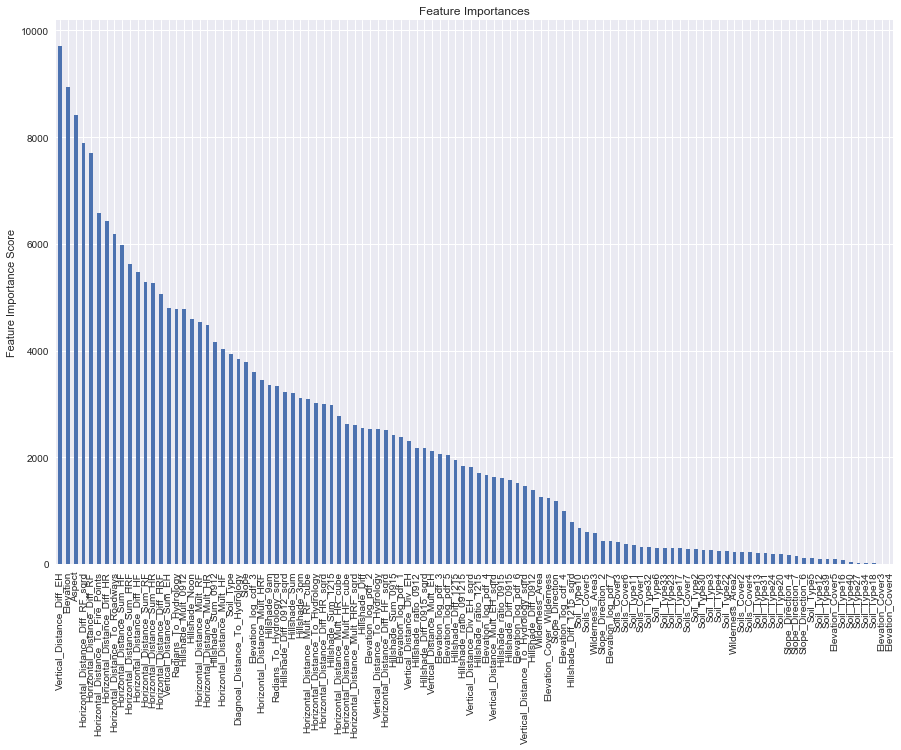

In [132]:
xgb3 = XGBClassifier(
         learning_rate =0.1,
         n_estimators=1000,
         max_depth=30,
         min_child_weight=0.7,
         gamma=0,
         subsample=1,
         colsample_bytree=0.6,
         reg_alpha=0.001,
         objective= 'multi:softmax',
         num_class = 7,
         nthread=4,
         scale_pos_weight=1,
         seed=77)
modelfit(xgb3, train_dup12_7, predictors)

### Step 6: Reducing Learning Rate
Lastly, we should lower the learning rate and add more trees. Lets use the cv function of XGBoost to do the job again.

1562
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=30, min_child_weight=0.7, missing=None, n_estimators=1562,
       n_jobs=1, nthread=4, num_class=7, objective='multi:softprob',
       random_state=0, reg_alpha=0.001, reg_lambda=1, scale_pos_weight=1,
       seed=77, silent=True, subsample=1)

Model Report
Accuracy : 1


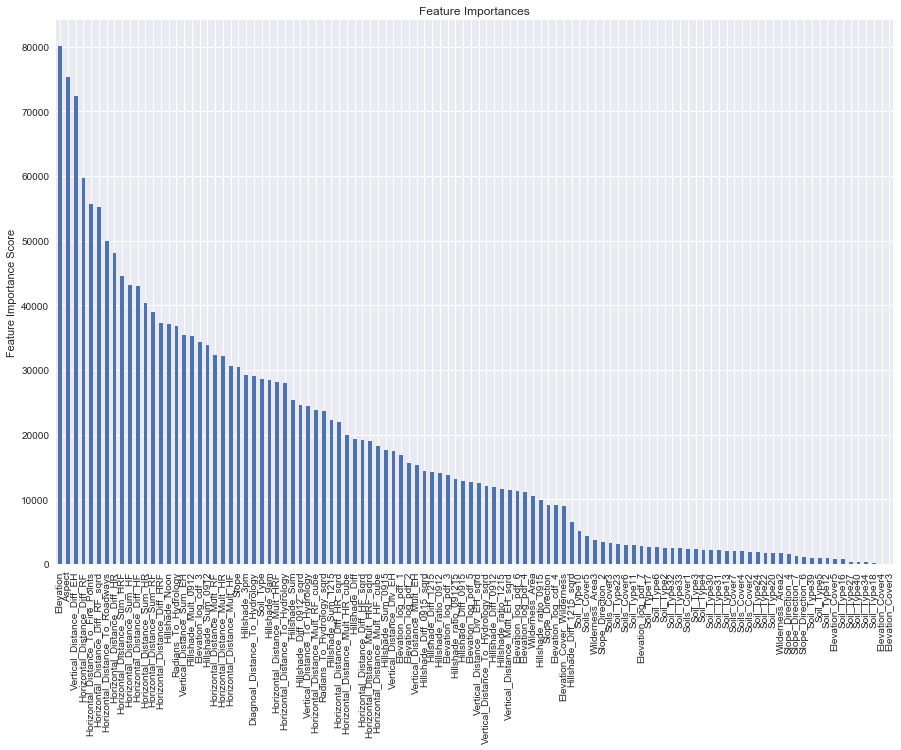

In [133]:
xgb4 = XGBClassifier(
         learning_rate =0.01,
         n_estimators=5000,
         max_depth=30,
         min_child_weight=0.7,
         gamma=0,
         subsample=1,
         colsample_bytree=0.6,
         reg_alpha=0.001,
         objective= 'multi:softmax',
         num_class = 7,
         nthread=4,
         scale_pos_weight=1,
         seed=77)
modelfit(xgb4, train_dup12_7, predictors)

Now we can see a significant boost in performance and the effect of parameter tuning is clearer. As we come to the end, I would like to share 2 key thoughts:

* It is **difficult to get a very big leap** in performance by just using **parameter tuning** or **slightly better models**. The max score for GBM was 0.8487 while XGBoost gave 0.8494. This is a decent improvement but not something very substantial.
* A significant jump can be obtained by other methods like **feature engineering**, creating **ensemble** of models, **stacking**, etc

In [134]:
xgb_tuned = XGBClassifier(
                 learning_rate =0.01,
                 n_estimators=1562,
                 max_depth=30,
                 min_child_weight=0.7,
                 gamma=0,
                 subsample=1,
                 colsample_bytree=0.6,
                 reg_alpha=0.001,
                 objective= 'multi:softmax',
                 num_class = 7,
                 nthread=4,
                 scale_pos_weight=1,
                 seed=77)

def make_submission_csv(model, Xtrain, y, Xtest, filename):
    model_fit = model.fit(Xtrain, y)
    submit_df = pd.read_csv('data/sampleSubmission.csv')
    submit_df['Cover_Type'] = model_fit.predict(Xtest) + 1
    submit_df.to_csv(filename, index=False)

In [135]:
make_submission_csv(xgb_tuned, train_dup12_7[predictors], train_dup12_7[target], X_scaled_test[predictors],
                   'data/submit_xgb_tuned_c12_concat_7.csv')

In [136]:
!kaggle competitions submit -c forest-cover-type-prediction -f data/submit_xgb_tuned_c12_concat_7.csv -m 'submit_xgb_tuned_c12_concat_7.csv'

Successfully submitted to Forest Cover Type Prediction


### `'submit_xgb_tuned_c12_concat_7.csv'`
submit_xgb_tuned_c12_concat_7.csv
an hour ago by Kyuhyung Choi
**0.79913**

* End of experiments
* Final result : `submit_xgb_tuned_c12_concat_7.csv` / kaggle accuracy. 0.79913